In [5]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

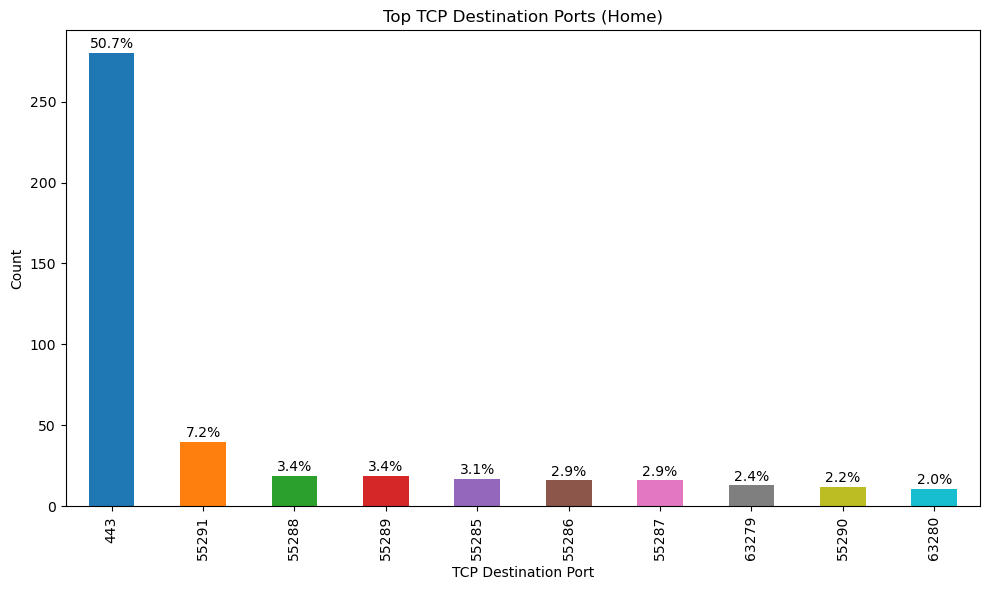

In [ ]:
# Read CSV file
df = pd.read_csv('/Users/deborahpark/Documents/GitHub/CS5344_Project2/Project2/home_traffic_fixed.csv', on_bad_lines='skip')
df = df.dropna(subset=['tcp.dstport'])

# Convert to int
df['tcp.dstport'] = df['tcp.dstport'].astype(int)

# Count each destination port appeared
port_counts = df['tcp.dstport'].value_counts()

# Select top 10 of most frequent port
top_ports = port_counts.head(10)

# Calculating percentage
total_packets = port_counts.sum()

# Create bar chart
plt.figure(figsize=(10,6))
# Different colors to each bar
colors = plt.cm.tab10(range(len(top_ports)))

bars = top_ports.plot(kind='bar', color=colors)

plt.title('Top TCP Destination Ports (Home)')
plt.xlabel('TCP Destination Port')
plt.ylabel('Count')
plt.grid(False)
plt.tight_layout()

# Add percentage labels to each bar
for idx, value in enumerate(top_ports):
    percent = (value / total_packets) * 100
    plt.text(idx, value + 1, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

# Plot
plt.show()

Total packets: 971578


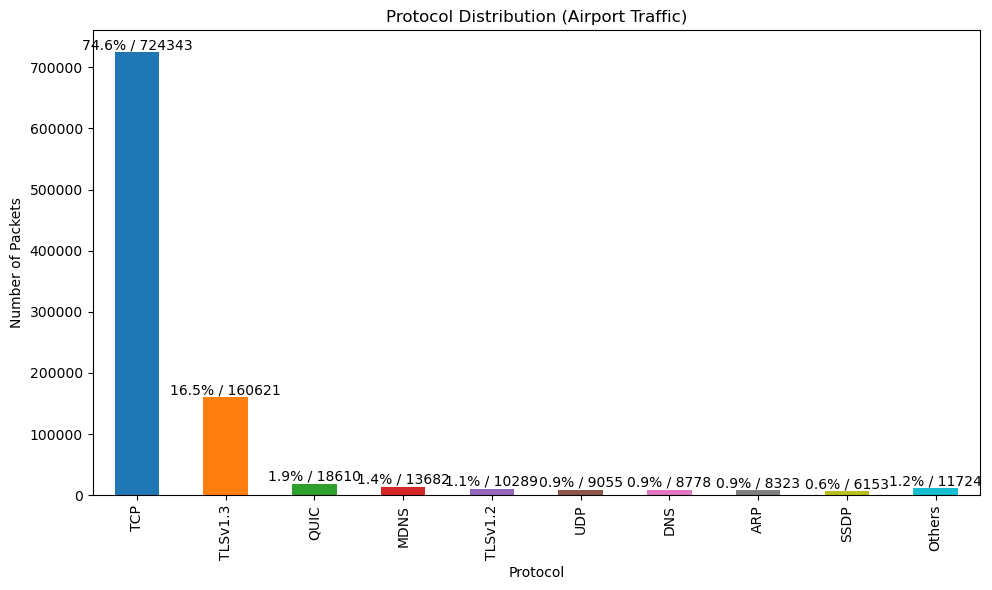

In [17]:
# Read the fixed CSV file
df = pd.read_csv('/Users/deborahpark/Documents/GitHub/CS5344_Project2/Project2/network_airport_fixed.csv')

# Count Protocol occurrences
protocol_counts = df['Protocol'].value_counts()

# Separate top 9 and the rest
top9 = protocol_counts.head(9)
others = protocol_counts.iloc[9:].sum()

# Combine into one new series using pd.concat
final_counts = pd.concat([top9, pd.Series({'Others': others})])

# Total packet count
total_packets = final_counts.sum()

# Create bar chart
plt.figure(figsize=(10,6))
colors = plt.cm.tab10(range(len(final_counts)))

bars = final_counts.plot(kind='bar', color=colors)

plt.title('Protocol Distribution (Airport Traffic)')
plt.xlabel('Protocol')
plt.ylabel('Number of Packets')
plt.grid(False)
plt.tight_layout()

# Add percentage + count labels above each bar
for idx, value in enumerate(final_counts):
    percent = (value / total_packets) * 100
    plt.text(idx, value + 1, f'{percent:.1f}% / {value}', ha='center', va='bottom', fontsize=10)

# Print total packet count
print(f"Total packets: {total_packets}")

# Show plot
plt.show()
